In [12]:
from PIL import Image
def merge_images(image1_path, image2_path, output_path):
    # Open both images
    img1 = Image.open(image1_path).convert('RGBA')
    img2 = Image.open(image2_path).convert('RGBA')
    
    # Ensure both images are of the same size
    if img1.size != img2.size:
        raise ValueError("Images must have the same dimensions")

    # Create a new image to store the result
    merged_img = Image.new('RGBA', img1.size)
    
    # Get pixel data
    pixels1 = img1.load()
    pixels2 = img2.load()
    merged_pixels = merged_img.load()
    
    # Iterate through all the pixels
    for y in range(img1.height):
        for x in range(img1.width):
            # Get RGBA values from both images
            r1, g1, b1, a1 = pixels1[x, y]
            r2, g2, b2, a2 = pixels2[x, y]

            # Extract the high 4 bits from the first image and low 4 bits from the second image
            r_merged = ((r1 & 0xF8) | ((r2 >> 3) & 0x07))
            g_merged = ((g1 & 0xF8) | ((g2 >> 3) & 0x07))
            b_merged = ((b1 & 0xF8) | ((b2 >> 3) & 0x07))
            a_merged = ((a1 & 0xF8) | ((a2 >> 3) & 0x07))
            
            # Set the new pixel
            merged_pixels[x, y] = (r_merged, g_merged, b_merged, a_merged)
    
    # Save the merged image
    merged_img.save(output_path)

# Example usage
merge_images(r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Boss.jpeg', r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Papontee.jpg', r'C:\Users\gofaf\Desktop\Janton\HW1\Merged_Image2.png')


In [9]:
from PIL import Image
def decode_image(merged_image_path, output_image1_path, output_image2_path):
    # Open the merged image
    merged_img = Image.open(merged_image_path).convert('RGBA')
    
    # Create new images to store the decoded results
    img1 = Image.new('RGBA', merged_img.size)
    img2 = Image.new('RGBA', merged_img.size)
    
    # Get pixel data
    merged_pixels = merged_img.load()
    pixels1 = img1.load()
    pixels2 = img2.load()
    
    # Iterate through all the pixels
    for y in range(merged_img.height):
        for x in range(merged_img.width):
            # Get the merged pixel values
            r_merged, g_merged, b_merged, a_merged = merged_pixels[x, y]

            # Decode the high 4 bits for the first image
            r1 = (r_merged & 0xF0)
            g1 = (g_merged & 0xF0)
            b1 = (b_merged & 0xF0)
            a1 = (a_merged & 0xF0)

            # Decode the low 4 bits for the second image
            r2 = (r_merged & 0x0F) << 4
            g2 = (g_merged & 0x0F) << 4
            b2 = (b_merged & 0x0F) << 4
            a2 = (a_merged & 0x0F) << 4

            # Set the new pixels for both images
            pixels1[x, y] = (r1, g1, b1, a1)
            pixels2[x, y] = (r2, g2, b2, a2)
    
    # Save the decoded images
    img1.save(output_image1_path)
    img2.save(output_image2_path)

# Example usage
decode_image(r'C:\Users\gofaf\Desktop\Janton\HW1\Merged_Image.png', r'C:\Users\gofaf\Desktop\Janton\HW1\decoded_image1.png', r'C:\Users\gofaf\Desktop\Janton\HW1\decoded_image2.png')

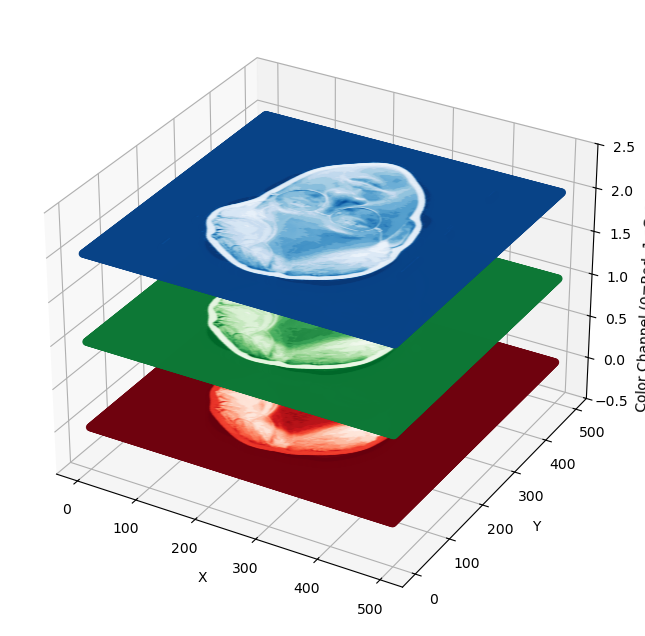

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from PIL import Image

def display_pixel_values_3d(image_path, resize_dim=(500, 500)):
    # Open the merged image
    img = Image.open(image_path).convert('RGBA')
    
    # Resize the image to a smaller size to reduce processing time
    img = img.resize(resize_dim)

    # Get pixel data
    pixels = img.load()

    # Get resized image dimensions
    width, height = img.size
    
    # Create arrays to store RGB values
    reds = np.zeros((height, width), dtype=int)
    greens = np.zeros((height, width), dtype=int)
    blues = np.zeros((height, width), dtype=int)

    # Extract RGB values for each pixel
    for y in range(height):
        for x in range(width):
            r, g, b, a = pixels[x, y]
            reds[y, x] = r
            greens[y, x] = g
            blues[y, x] = b

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create X, Y coordinates
    X, Y = np.meshgrid(np.arange(width), np.arange(height))

    # Plot Red values on the Z=0 layer
    ax.scatter(X, Y, np.zeros_like(reds), c=reds/255.0, cmap='Reds', label='Red', alpha=0.7)

    # Plot Green values on the Z=1 layer
    ax.scatter(X, Y, np.ones_like(greens), c=greens/255.0, cmap='Greens', label='Green', alpha=0.7)

    # Plot Blue values on the Z=2 layer
    ax.scatter(X, Y, np.full_like(blues, 2), c=blues/255.0, cmap='Blues', label='Blue', alpha=0.7)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Color Channel (0=Red, 1=Green, 2=Blue)')

    # Set limits for the axes
    ax.set_zlim(-0.5, 2.5)  # Keep Z-axis limited to show 3 layers

    plt.show()

# Path to your merged image
merged_image_path = r'C:\Users\gofaf\Desktop\Janton\HW1\Merged_Image.png'

# Display RGB values in 3D with layers for each color
display_pixel_values_3d(merged_image_path, resize_dim=(500, 500))


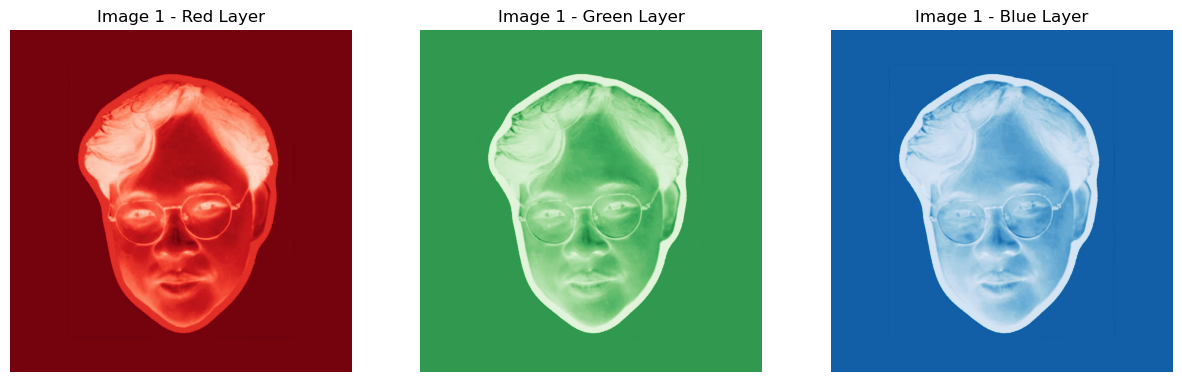

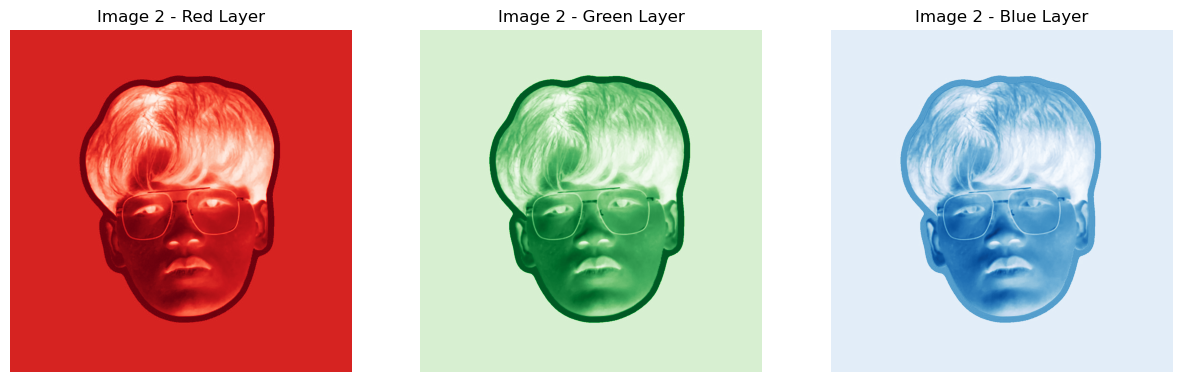

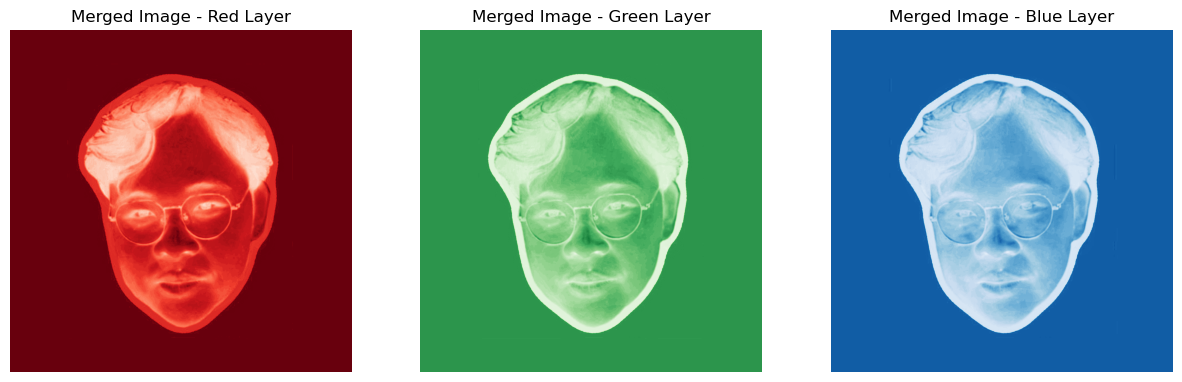

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_rgb_layers(image_path, title):
    # Open the image
    img = Image.open(image_path).convert('RGBA')
    
    # Get pixel data
    pixels = img.load()
    width, height = img.size

    # Create arrays for R, G, B layers
    reds = np.zeros((height, width), dtype=int)
    greens = np.zeros((height, width), dtype=int)
    blues = np.zeros((height, width), dtype=int)

    # Extract RGB values for each pixel
    for y in range(height):
        for x in range(width):
            r, g, b, a = pixels[x, y]
            reds[y, x] = r
            greens[y, x] = g
            blues[y, x] = b

    # Create a figure to display the RGB layers
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(reds, cmap='Reds', vmin=0, vmax=255)
    axs[0].set_title(f'{title} - Red Layer')
    axs[0].axis('off')

    axs[1].imshow(greens, cmap='Greens', vmin=0, vmax=255)
    axs[1].set_title(f'{title} - Green Layer')
    axs[1].axis('off')

    axs[2].imshow(blues, cmap='Blues', vmin=0, vmax=255)
    axs[2].set_title(f'{title} - Blue Layer')
    axs[2].axis('off')

    plt.show()

def merge_images(image1_path, image2_path, output_path):
    # Open both images
    img1 = Image.open(image1_path).convert('RGBA')
    img2 = Image.open(image2_path).convert('RGBA')
    
    # Ensure both images are of the same size
    if img1.size != img2.size:
        raise ValueError("Images must have the same dimensions")

    # Create a new image to store the result
    merged_img = Image.new('RGBA', img1.size)
    
    # Get pixel data
    pixels1 = img1.load()
    pixels2 = img2.load()
    merged_pixels = merged_img.load()
    
    # Iterate through all the pixels
    for y in range(img1.height):
        for x in range(img1.width):
            # Get RGBA values from both images
            r1, g1, b1, a1 = pixels1[x, y]
            r2, g2, b2, a2 = pixels2[x, y]

            # Extract the high 4 bits from the first image and low 4 bits from the second image
            r_merged = ((r1 & 0xF8) | ((r2 >> 3) & 0x07))
            g_merged = ((g1 & 0xF8) | ((g2 >> 3) & 0x07))
            b_merged = ((b1 & 0xF8) | ((b2 >> 3) & 0x07))
            a_merged = ((a1 & 0xF8) | ((a2 >> 3) & 0x07))
            
            # Set the new pixel
            merged_pixels[x, y] = (r_merged, g_merged, b_merged, a_merged)
    
    # Save the merged image
    merged_img.save(output_path)

# Paths to your images
image1_path = r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Boss.jpeg'
image2_path = r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Papontee.jpg'
merged_image_path = r'C:\Users\gofaf\Desktop\Janton\HW1\Merged_Image2.png'

# Display RGB layers for each image
display_rgb_layers(image1_path, "Image 1")
display_rgb_layers(image2_path, "Image 2")
display_rgb_layers(merged_image_path, "Merged Image")

# Merge images
merge_images(image1_path, image2_path, merged_image_path)


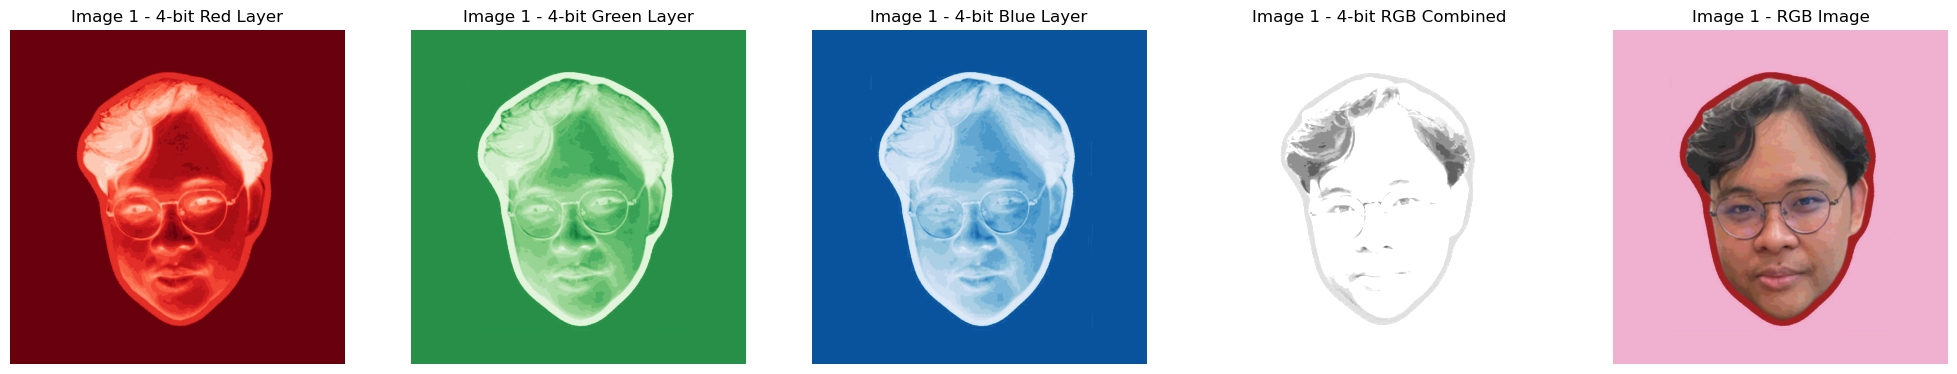

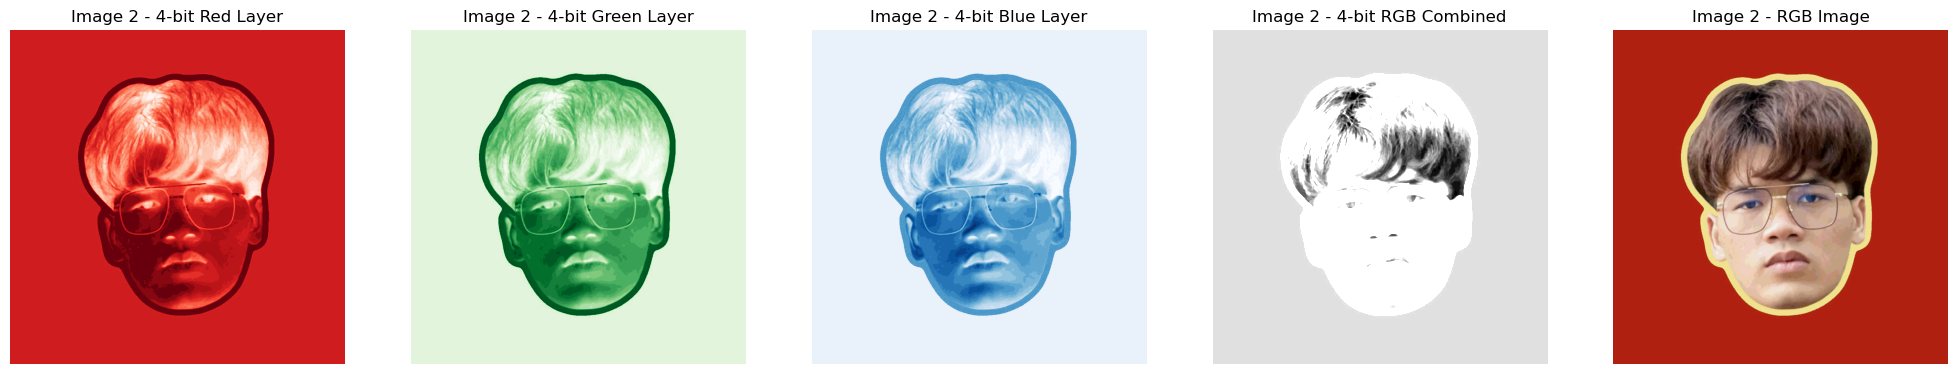

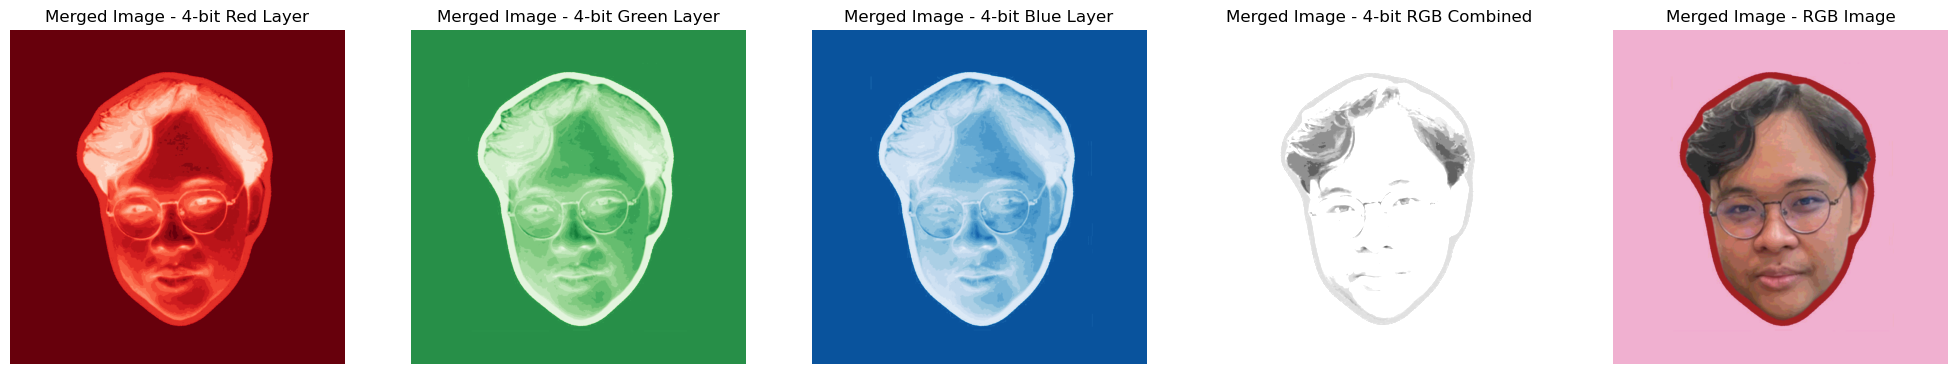

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_4bit_rgb_layers(image_path, title):
    img = Image.open(image_path).convert('RGBA')
    pixels = img.load()
    width, height = img.size
    reds = np.zeros((height, width), dtype=int)
    greens = np.zeros((height, width), dtype=int)
    blues = np.zeros((height, width), dtype=int)
    for y in range(height):
        for x in range(width):
            r, g, b, a = pixels[x, y]
            reds[y, x] = r >> 4
            greens[y, x] = g >> 4
            blues[y, x] = b >> 4
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    axs[0].imshow(reds, cmap='Reds', vmin=0, vmax=15)
    axs[0].set_title(f'{title} - 4-bit Red Layer')
    axs[0].axis('off')
    axs[1].imshow(greens, cmap='Greens', vmin=0, vmax=15)
    axs[1].set_title(f'{title} - 4-bit Green Layer')
    axs[1].axis('off')
    axs[2].imshow(blues, cmap='Blues', vmin=0, vmax=15)
    axs[2].set_title(f'{title} - 4-bit Blue Layer')
    axs[2].axis('off')
    rgb_combined = (reds << 4) + (greens << 4) + (blues << 4)
    axs[3].imshow(rgb_combined, cmap='gray', vmin=0, vmax=255)
    axs[3].set_title(f'{title} - 4-bit RGB Combined')
    axs[3].axis('off')
    rgb_image = np.stack((reds << 4, greens << 4, blues << 4), axis=-1)
    axs[4].imshow(rgb_image)
    axs[4].set_title(f'{title} - RGB Image')
    axs[4].axis('off')
    plt.show()

def merge_images(image1_path, image2_path, output_path):
    img1 = Image.open(image1_path).convert('RGBA')
    img2 = Image.open(image2_path).convert('RGBA')
    if img1.size != img2.size:
        raise ValueError("Images must have the same dimensions")
    merged_img = Image.new('RGBA', img1.size)
    pixels1 = img1.load()
    pixels2 = img2.load()
    merged_pixels = merged_img.load()
    for y in range(img1.height):
        for x in range(img1.width):
            r1, g1, b1, a1 = pixels1[x, y]
            r2, g2, b2, a2 = pixels2[x, y]
            r_merged = ((r1 & 0xF0) | (r2 >> 4))
            g_merged = ((g1 & 0xF0) | (g2 >> 4))
            b_merged = ((b1 & 0xF0) | (b2 >> 4))
            a_merged = ((a1 & 0xF0) | (a2 >> 4))
            merged_pixels[x, y] = (r_merged, g_merged, b_merged, a_merged)
    merged_img.save(output_path)

image1_path = r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Boss.jpeg'
image2_path = r'C:\Users\gofaf\Desktop\Janton\HW1\IMG_Papontee.jpg'
merged_image_path = r'C:\Users\gofaf\Desktop\Janton\HW1\Merged_Image2.png'

display_4bit_rgb_layers(image1_path, "Image 1")
display_4bit_rgb_layers(image2_path, "Image 2")
merge_images(image1_path, image2_path, merged_image_path)
display_4bit_rgb_layers(merged_image_path, "Merged Image")
